# Scenario
Throughout your career as a data analyst, you will assess continuing data sources for their relevance to specific research questions. Organizations use data sets to analyze their operations. Organizations have many possible uses for these data sets to support their decision-making processes.

In your previous coursework, you have explored a variety of supervised and unsupervised data mining models. You have seen the power of using data analytical techniques to help organizations make data-driven decisions and now want to extend these models into areas of machine learning and artificial intelligence. In this course, you will explore the use of neural networks and natural language processing (NLP).

**Data Selected**
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

# Part I:  Research Question

## A.  Describe the purpose of this data analysis by doing the following:

### A1.  Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.
*Rubric: The submission summarizes 1 research question, and the research question is relevant to a realistic organizational situation and sentiment analysis. The research question can be answered using the selected dataset, neural network model, and NLP techniques.*

Is it possible to analyze customer sentiment using Neural Networks and the Natural Language Processing technique so that this company can take appropriate actions to improve customer satisfaction?

### A2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.
*Rubric: The submission clearly defines each of the objectives or goals of the data analysis. Each objective or goal is reasonable within the scope of the research question and represented in the available data.*

The goal of this data analysis is to attempt to predict the customer sentiment (how a user feels) of a product or service based off the word choices that the customer has chosen.

### A3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.
*Rubric: The submission identifies an industry-relevant type of neural network that can be trained to produce useful text classification predications on text sequences on the selected dataset.*

A Bidirectional Recurrent Neural Network (RNN) is capable of performing a sentiment analysis and text classification-related task including Sequence Labeling, Speech, Tagging, and more. Bidirectional RNNs maximize the order sensitivity of an RNN. An LSTM layer was input to the Bidirectional layer in order to catch the complexities that a single RNN might miss. In other words, Bidirectional RNNs have two layers where one of the layers interprets the sequences in chronological order and the other in anti-chronological order.

# Part II:  Data Preparation

## B.  Summarize the data cleaning process by doing the following:

### B1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:
*Rubric: The submission performs exploratory data analysis on the chosen dataset and includes an explanation of each of the 4 listed elements. Each element is accurate and aligns to the chosen data set.*

- presence of unusual characters (e.g., emojis, non-English characters, etc.)
- vocabulary size
- proposed word embedding length
- statistical justification for the chosen maximum sequence length

**Data Set Chosen**

Source:
Generating Personalized Recipes from Historical User Preferences
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019
pdf

In [1]:
from platform import python_version
print("python version: ", python_version())

python version:  3.8.5


In [2]:
# LOADING PYTHON LIBRARIES NEEDED FOR THE ANALYSIS
import sys
import os

#scikit-learn for predictive analysis
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import re
import tensorflow as tf
import keras

import tensorflow as ft
from tensorflow import keras
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer # To convert input text to tokens
from tensorflow.keras.callbacks import EarlyStopping # To stop training at a threshold
from tensorflow.keras.models import load_model # To load a saved model
from tensorflow.keras.layers import Activation, Dropout, Dense, Embedding, Conv1D, LSTM
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences # For text padding

import pandas as pd # For dataframe and data manipulations
import numpy as np # Provides array objects for calculations
import gzip # For unzipping the input customer review files
import seaborn as sns # For visualization like data distribution matrix
import nltk # NLP toolkit
import re # For regular expression

from nltk.corpus import stopwords # For stopword usage
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import numpy
from scipy.signal import max_len_seq
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("vlag", as_cmap=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\verab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\verab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

In [4]:
# Import the initial dataset into an intial_df
# Read the raw data

df_amazon = pd.read_csv('./sentiment labelled sentences/amazon_cells_labelled.txt', delimiter='\t', header=None)
df_amazon.columns=['review','sentiment']

df_imdb = pd.read_csv('./sentiment labelled sentences/imdb_labelled.txt', delimiter='\t', header=None)
df_imdb.columns=['review','sentiment']

df_yelp = pd.read_csv('./sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None)
df_yelp.columns=['review','sentiment']

In [5]:
# Look at the shapre of the data
print(df_amazon.shape)
print(df_imdb.shape)
print(df_yelp.shape)

(1000, 2)
(748, 2)
(1000, 2)


In [6]:
df_amazon.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
df_imdb.describe()

,sentiment
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df_yelp.describe()

,sentiment
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
frames = [df_amazon, df_imdb, df_yelp]
df = pd.concat(frames)
df.describe()

,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
# presence of unusual characters (e.g., emojis, non-English characters, etc.)
pd.set_option('display.max_colwidth', 5000)
df = df_amazon
df.head(10)

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

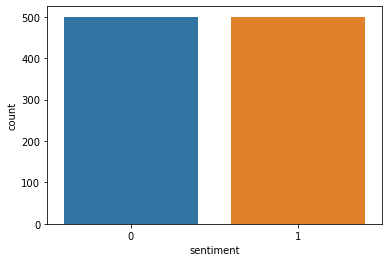

In [11]:
# Verify the distribution of the data
sns.countplot(data=df, x='sentiment')

There are slightly more positive reviews than negative reviews.

# Data Cleaning

In [12]:
# Check that the data type of the sentiment column is an integer
df['sentiment'].dtype

dtype('int64')

In [13]:
# Drop null values
df = df.dropna()

In [14]:
# Convert any non string values into string values
for i in range(0, len(df)-1):
    if type(df.iloc[i] ['review'])!=str:
        df.iloc[i] ['review'] = str(df.iloc[i] ['review'])

In [15]:
# Remove unusual characters: uppercase letters, punctuation marks, emoticons, and non-English characters
reviews = df['review']
list_of_characters = []
for r in reviews:
    for char in r:
        if char not in list_of_characters:
            list_of_characters.append(char)
print(list_of_characters)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']']


In [16]:
# Tokenize sentences into a list of tokens and remove any stop words

In [17]:
review_list = []
stop_words = stopwords.words('english')
for review in df.review:
    review=re.sub("[^a-zA-Z0-9]"," ",review) # Use Regular Expression to remove non-alphanumeric characters from strings
    review = review.lower() # Convert all characters to lower case
    review=nltk.word_tokenize(review) # Tokenize the description
    lemma = nltk.WordNetLemmatizer() # Perform lemmatization
    review = [lemma.lemmatize(word) for word in review]
    review = [word for word in review if not word in stop_words] # Remove stop words
    review = " ".join(review) # Join the description words
    review_list.append(review) # Add the clean description to the description_list
print(review_list)


['way plug u unless go converter', 'good case excellent value', 'great jawbone', 'tied charger conversation lasting 45 minute major problem', 'mic great', 'jiggle plug get line right get decent volume', 'several dozen several hundred contact imagine fun sending one one', 'razr owner must', 'needle say wasted money', 'waste money time', 'sound quality great', 'wa impressed going original battery extended battery', 'two seperated mere 5 ft started notice excessive static garbled sound headset', 'good quality though', 'design odd ear clip comfortable', 'highly recommend one ha blue tooth phone', 'advise everyone fooled', 'far good', 'work great', 'click place way make wonder long mechanism would last', 'went motorola website followed direction could get pair', 'bought use kindle fire absolutely loved', 'commercial misleading', 'yet run new battery two bar three day without charging', 'bought mother problem battery', 'great pocket pc phone combination', 'owned phone 7 month say best mobile

In [18]:
# Identify vocabulary size - bag of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
vocabulary_size = len(tokenizer.word_index) + 1
print("Vocabulary Size: ", vocabulary_size)

Vocabulary Size:  1879


There are 1879 unique words in the reviews. This is our vocabulary size.

In [19]:
# proposed word embedding length - Determine the word embedding and explore embedded words based on target inputs
# Source: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
word_embedding_length = int(round(numpy.sqrt(vocabulary_size)))
print("Proposed word embedding length:", word_embedding_length)
tf.keras.layers.Embedding(vocabulary_size, word_embedding_length)

Proposed word embedding length: 43


The proposed word embedding length is determined by the distance of a word from the beginning of the vector. For example, if in a vector that has 300 spaces, the position of the word is 120 counting from the beginning of the vector, the embedding length of that word is 120 (Brownlee, 2021).

I have used the process of the 4th square root to determine the proposed length.

In [20]:
# statistical justification for the chosen maximum sequence length
# Set the maxaimum sequence length based on the length of the longest sentence in the data set
max_sequence_length = 0
sequence_lengths = []
for review in review_list:
    review_length = len(review)
    sequence_lengths.append(review_length)

# Calculate maximum sequence length
max_sequence_length = np.max(sequence_lengths)

# Caluculate median sequence length
median_sequence_length = np.median(sequence_lengths)

# Calculate minimum sequence length
min_sequence_length = np.min(sequence_lengths)

print(f"Maximum sequence length: {max_sequence_length}")
print(f"Median sequence length: {median_sequence_length}")
print(f"Minimum sequence length: {min_sequence_length}")

Maximum sequence length: 117
Median sequence length: 29.0
Minimum sequence length: 3


Now we have the information for padding sequences. We know that our minimum sequence will be padded with 114 tokens in order to meet the maximum length sequence in order to fit all the sequences into a matrix.

### B2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.
*Rubric: The submission completely describes the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process. The description is accurate.*

Resource: https://tensorflow.org/api_docs/python/tf/keras/preprocessing/text/tokenizer

The TensorFlow tokenizer class was used to vectorize the text corpus, by turning each text into a vector of integers. The vocabulary size was then created from the tokenized vector by counting the length of the indexes on the vector. The vocabulary size was then used used to find the word embedding length. The word embedding length is important to building our NLP model as it is an input value for one of the parameters.


### B3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:
*Rubric: The submission accurately explains the padding process used to standardize the length of sequences and includes an explanation of where the padding occurs. The padding process aligns with the chosen data, and a screenshot of a single padded sequence is provided.*

- if the padding occurs before or after the text sequence
- a screenshot of a single padded sequence

In order for the NLP model to run as expected all sequences must be the same length. Padding of the sequences makes sure all the sequence lengths are the same size. I have chosen to pad and truncate the sequences after (post) the end of the sequence.

In [21]:
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding="post", truncating="post")

In [22]:
print(padded_sequences[1])

[ 21  48  54 272   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]


### B4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.
*Rubric: The submission clearly and accurately identifies how many categories of sentiment will be used and an appropriate fitting activation function for the final dense layer of the network.*

Two categories of sentiment will be used. The activation function for the final Dense layer of the network is 'sigmoid'. Sigmoid is the best activation function to use on the final Dense layer of a binary sentiment problem. (https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91)

### B5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.
*Rubric: The submission explains the steps used to prepare the data for analysis and accurately includes the size of the training, validation, and test split. The steps relate to preparing for neural network models and NLP techniques.*

1. Read the data from the dataset
2. Check on unusual or any abnormal characters
3. Clean the data
4. Explore the data
5. Create a 2-Dimensional array with reviews and sentiments by encoding
6. Split the data into train and test data sets with an 80/20 split
7. Apply the tokenizer to the training set with the fit_on_texts() method
8. Retrieve the word_index of the training set
9. Add post-padding to the sequences to get the maximum length needed
10. Fit the final model and convert both the training and test set into arrays using numpy

In [23]:
# Split the data set into training, test, and validation data sets
X = padded_sequences
y = numpy.array(df['sentiment'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=40, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=.2, random_state=40, stratify=y)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)
print("Validation Size:", X_validation.shape)

Training Size: (800, 117)
Testing Size: (200, 117)
Validation Size: (200, 117)


### B6.  Provide a copy of the prepared dataset.
*Rubric: The submission provides a copy of a fully prepared dataset.*

In [24]:
pd.DataFrame(X_train).to_csv('./sentiment labelled sentences/X_training_df.csv')
pd.DataFrame(X_test).to_csv('./sentiment labelled sentences/X_testing_df.csv')
pd.DataFrame(X_validation).to_csv('./sentiment labelled sentences/X_validate_df.csv')
pd.DataFrame(y_train).to_csv('./sentiment labelled sentences/y_training_df.csv')
pd.DataFrame(y_test).to_csv('./sentiment labelled sentences/y_testing_df.csv')
pd.DataFrame(y_validation).to_csv('./sentiment labelled sentences/y_validate_df.csv')

# Part III:  Network Architecture

## C.  Describe the type of network used by doing the following:

### C1.  Provide the output of the model summary of the function from TensorFlow.
*Rubric:The submission provides the complete output of the model summary of the function from TensorFlow. The output aligns with the type of network used.*

In [25]:
# Create an activation function filled with dense layers of the neural network
loss="binary_crossentropy"
optimizer="adam" #rmsprop

num_epochs=25

y_train.reshape((-1,1))
y_test.reshape((-1,1))
y_validation.reshape((-1,1))

# Define early stopping monitor
early_stopping_monitor=EarlyStopping(patience=2, verbose=1)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, word_embedding_length, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,dropout=0.6)), # Resource: https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid'), # binary problems should have sigmoid as last layer fucntion activation
    tf.keras.layers.Flatten()
])

model.compile(loss=loss, optimizer=optimizer, metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=early_stopping_monitor)


Epoch 14: early stopping


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 117, 43)           80797     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               10240     
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                        

### C2.  Discuss the number of layers, the type of layers, and total number of parameters.
*Rubric: The submission completely and accurately discusses the number of layers, the type of layers, and the total number of parameters in the network.*

**1st Layer: Core Type = Embedding**
- Layer Type = Input
    - Total # Parameters = 80,797
    
**2nd Layer: Core Type = Bidirectional**
- Layer Type = Input
    - Total # Parameters = 10,240
    
**3rd Layer: Core Type = Dense**
- Layer Type = Hidden
    - Total # Parameters = 5050
    
**4th Layer: Core Type = Dense**
- Layer Type = Hidden
    - Total # Parameters = 102
    
**5th Layer: Core Type = Flatten**
- Layer Type = Output
    - Total # Parameters = 0
    
**Total Number of Parameters**
- 100,289 where 100,289 are trainable and 0 are non-trainable

### C3.  Justify the choice of hyperparameters, including the following elements:
*Rubric: The submission logically justifies the choice of hyperparameters, including each of the 6 listed elements, and each element aligns with the network used.*
- Activation Functions
    - Sigmoid was selected because it performs best for binary values such as those in the sentiment column of the data set. The formula for the Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)). The second element is assumed to be zero. The sigmoid function always returns a value between 0 and 1. (Source: https://keras.io/api/layers/activations/)
- Number of Nodes Per Layer
    - The number of nodes that were selected for each Input Dense layers 3 and 4 was selected by trial and error. 
    - The Output Dense layer was set to 2 nodes because the y values are sentimental. In other words 0 for a negative review and 1 for a positive review. This means there can only be two possible outcomes.
- Loss Function
    - The loss function was set to binary cross entropy because it is best for a binary outcome. "Loss: A scalar value that we attempt to minimize during our training of the model. The lower the loss, the closer our predictions are to the true labels. This is usually Mean Squared Error (MSE) as David Maust said above, or often in Keras, Categorical Cross Entropy." (https://stackoverflow.com/questions/34673396/what-does-the-standard-keras-model-output-mean-what-is-epoch-and-loss-in-keras#:~:text=Loss%3A%20A%20scalar%20value%20that,in%20Keras%2C%20Categorical%20Cross%20Entropy)
- Optimizer
    - The Adam optimizer was the selected optimizer because it is the most commonly used in a deep learning problem like we have built here. (https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Stopping Criteria
    - The stopping criteria is used in order to tell the network to stop early if a certain criteria is met. In this case I used the value of the accuracy score as my stopping criteria as that is what I was most interested in achieving.
- Evaluation Metric
    - Accuracy was used as the evaluation metric to be used to assess the performance of the model as it was of the most interest.

# Part IV:  Model Evaluation

## D.  Evaluate the model training process and its relevant outcomes by doing the following:

### D1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.
*Rubric: The submission accurately discusses the impact of using stopping criteria instead of defining the number of epochs. A screenshot showing the final training epoch is provided.*

Resources: https://stats.stackexchange.com/questions/231061/how-to-use-early-stopping-properly-for-training-deep-neural-network, https://keras.io/api/callbacks/early_stopping/

The number or epochs is used to tell the model to continue to train within the range of 0 to the epoch set on the model. Epochs can be used to determine the best validation score. This can be done by a manual process or automatically by using the early stopping parameter called patience. Patience tells the model how many epochs the model should go without improving before training is stopped. A general rule is to set the patience to 2 or 3. 

In [27]:
# list all data in history
# Sources: https://keras.io/api/callbacks/, https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
score = model.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 29ms/step - loss: 0.4119 - acc: 0.8250


### D2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.
*Rubric: The submission provides complete visualizations of the model’s training process, including a line graph of the loss and the chosen evaluation metric. The visualizations are clearly labeled and align with the model’s training process.*


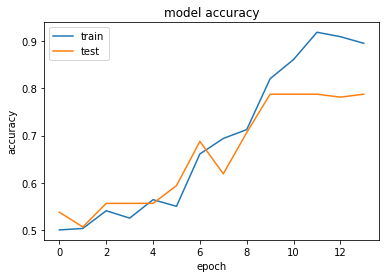

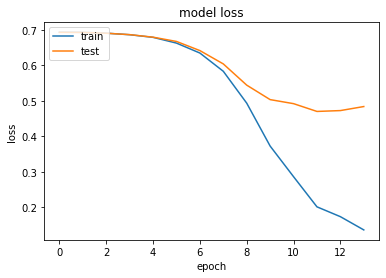

In [28]:
# Source: https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### D3.  Assess the fitness of the model and any measures taken to address overfitting.
*Rubric: The submission completely and accurately assesses the fitness of the model, and the assessment includes any measures taken to address overfitting.*

Source: https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

To decrease the complexity, I simply removed layers and reduced the number of neurons in order to make our network smaller. There is no general rule on how much to remove or how big your network should be.

At first the I had 4 Dense Layers and a GlobalAveragePoolin1D layer in my network. After viewing the results of the graph of the training process it was clear the model was over fitting. I decreased the number of nodes per Dense layer first and that helped but definitely did not solve the overfitting issue. After some more research on different types of network layers that are good for high accuracy results and a good fit I discovered the Bidirectional network layer with an input layer of LSTM. Updating the GolbalAveragePoolingLayer1D to the Bidirecitonal layer in addition to reducing the number of Dense layers and the total number of nodes for the remaining Dense layers the model had a much better fit.


### D4.  Discuss the predictive accuracy of the trained network.
*Rubric: The submission discusses the predictive accuracy of the trained network using the selected evaluation metric from part D2.*

The model has a predictive accuracy of 67%. This means that every 6 or 7 predictions from data input to the model will be correct.


In [29]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4118857979774475
Test Accuracy: 0.824999988079071


# Part V:  Summary and Recommendations

## E.  Provide the code used to save the trained network within the neural network.
*Rubric: The submission provides the code used to save the trained network within the neural network, and the code is complete and accurate.*

## F.  Discuss the functionality of your neural network, including the impact of the network architecture.
*Rubric: The submission accurately discusses the functionality of the neural network, including the impact of the network architecture. The discussion aligns with the research question from part A.*

The neural network includes an input of ~2,200 customer reviews to train the model and ~550 reviews to test and validate the model. NLP was was used to analyze the sentiments of the customers from the review where the actual sentiment label was 0 for a negative review and 1 for a positive review. The model was tuned to perform prediction on new customer reviews in order to identify customer sentiments if they were positive or negative reviews. 

The impact of the network architecture was created through experimentation based on research. There are different keras layers that perform best for a NLP prediction model. Each layer's parameters were adjusted until an acceptable degree of accuracy was reached to detect the sentiment of a review.

## G.  Recommend a course of action based on your results.
*Rubric: The submission recommends an appropriate course of action based on the results as they relate to the research question.*

The trained neural network is capable of processing natural language to identify sentiments from customer reviews. The neural network has a predictive accuracy of 82% and therefore capable of analyzing customer feedback and identifying sentiments in the review texts submitted by customers. This sentiment analysis can help the company to figure out which products are liked or not liked by customers based on the positive and negative reviews. Based on the analysis, the company can take appropriate action to address any concerns shown in the reviews.

# Part VI: Reporting

## H.  Create your neural network using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.
*Rubric: The neural network is created in an industry-relevant interactive development environment and is complete, accurate, and in alignment with the data analysis of the report. A PDF or HTML document of the executed notebook presentation is provided.*


## I.  List the web sources used to acquire data or segments of third-party code to support the application.
*Rubric: The submission lists all web sources used to acquire data or segments of third-party code, and all the listed web sources are reliable.*

1. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
2. https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91
3. https://keras.io/api/callbacks/
4. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
5. https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/

## J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*Rubric: The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*
1. https://keras.io/api/layers/activations/
2. https://stackoverflow.com/questions/34673396/what-does-the-standard-keras-model-output-mean-what-is-epoch-and-loss-in-keras#:~:text=Loss%3A%20A%20scalar%20value%20that,in%20Keras%2C%20Categorical%20Cross%20Entropy
3. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
4. https://stats.stackexchange.com/questions/231061/how-to-use-early-stopping-properly-for-training-deep-neural-network
5. https://keras.io/api/callbacks/early_stopping/
6. https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323
7. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
8. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
9. https://tensorflow.org/api_docs/python/tf/keras/preprocessing/text/tokenizer

## K.  Demonstrate professional communication in the content and presentation of your submission.
*Rubric: Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.*
